## Project Dependencies 

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
import seaborn as sns


## Loading Dataset

Print first five rows to check if dataset is imported successfully and to observe nature of the data.

In [8]:
d0 = pd.read_csv("digit-recognizer/train.csv")
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [11]:
rows, cols = d0.shape 
print("Dataset contains", rows, "rows and", cols, "columns.")

Dataset contains 42000 rows and 785 columns.


In [12]:
# drops the 'label' column

l = d0['label'] 
d = d0.drop('label', axis = 1)  
print(d.shape)

(42000, 784)


## Display test instance

3


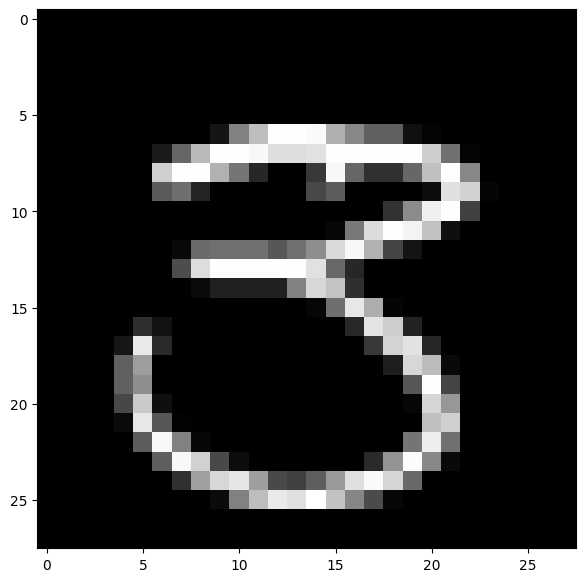

In [13]:
plt.figure(figsize = (7,7))  
idx = 7  

grid_data = d.iloc[idx]
grid_data = grid_data.to_numpy()  
grid_data = grid_data.reshape(28, 28)  

plt.imshow(grid_data, interpolation="none", cmap = "gray") 

print(l[idx])

## 2-D visualization using PCA 

In [14]:
labels = l 
data = d 
print(f'the sahpe of sample data:  {data.shape}')

the sahpe of sample data:  (42000, 784)


## Data preprocessing : Column Standraizing 

In [23]:
scaler = StandardScaler()
standarized_data = scaler.fit_transform(data)
print(f'standarized data mean: {standarized_data.mean().round()}')

standarized data mean: 0.0


## Co-variance, Eigen Values and Eigen Vectors Calculations 

In [25]:
sample_data = standarized_data
n = sample_data.shape[0]
covar_mat = (1 / n) * np.matmul(sample_data.T, sample_data)
print(f'The shape of co-variance matrix is {covar_mat.shape}')

The shape of co-variance matrix is (784, 784)


In [26]:
from scipy.linalg import eigh 

#return the top 2 eign values 
values, vectors = eigh(covar_mat, subset_by_index = [782, 783]) 
print(f'shape of eign vectors = {vectors.shape}')

# Converting the eigen vectors into (2,d) vectors / row vectors for future computioins 
vectors = vectors[:, ::-1] # inversing the coulmns order so the first coulmns becoms the first eigen vectors 
vectors = vectors.T 
print(f'The updated shape of vectors is: {vectors.shape}')

shape of eign vectors = (784, 2)
The updated shape of vectors is: (2, 784)


## projects the original data points onto the subspace spanned by the top 2 eigenvectors

In [28]:
new_coordinates = np.matmul(vectors, sample_data.T) # (2, 784) *  (784, 15000) 

In [29]:
new_coordinates = np.vstack((new_coordinates, labels)).T # add the lables as a new raw then trasnpose the entire data 

## Visualizatino

In [33]:
# Creating a new data frame for ploting the labels points . 
df = pd.DataFrame(data = new_coordinates, columns=("1st_principal", "2nd_principal", "label")) 
print(df.head())

   1st_principal  2nd_principal  label
0      -5.140478      -5.226445    1.0
1      19.292332       6.032996    0.0
2      -7.644503      -1.705813    1.0
3      -0.474207       5.836139    4.0
4      26.559574       6.024818    0.0


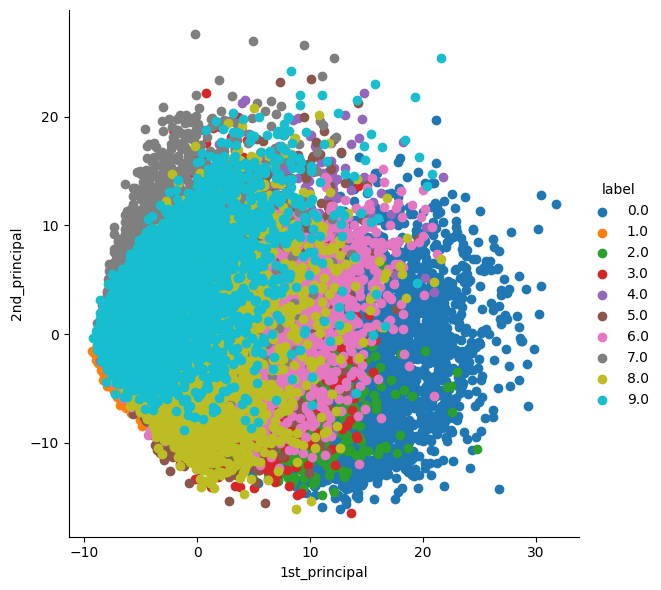

In [35]:
sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA using sklearn 

In [37]:
pca = decomposition.PCA()
pca.n_components = 2 
pca_data = pca.fit_transform(sample_data)
print(f'shape of result data using PCA form sklearn is {pca_data.shape[0]} data points with {pca_data.shape[1]} dimensinos')

shape of result data using PCA form sklearn is 42000 data points with 2 dimensinos


In [38]:
pca_data_labeld = np.vstack((pca_data.T, labels)).T
df2 = pd.DataFrame(data = pca_data_labeld, columns=("1st component", "2nd component", "label"))
df2.head()

,1st component,2nd component,label
0,-5.140483,-5.226383,1.0
1,19.292342,6.033115,0.0
2,-7.644491,-1.705865,1.0
3,-0.474229,5.835991,4.0
4,26.559579,6.024944,0.0


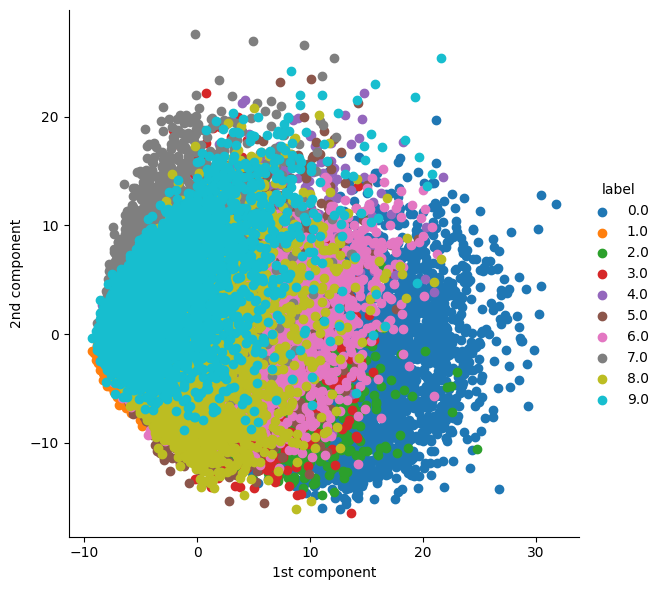

In [16]:
sns.FacetGrid(df2, hue='label', height=6).map(plt.scatter, "1st component", "2nd component" ).add_legend()
plt.show()

## Conclusions 

Based on the PCA dimensionality reduction performed on the MNIST dataset, it's evident that PCA might not be the most suitable technique for this dataset. The plot generated from the PCA transformation exhibits significant overlapping, indicating that the reduced-dimensional representation lacks the discriminative power necessary to effectively separate the distinct classes present in the MNIST dataset. Consequently, alternative dimensionality reduction techniques or classification algorithms may be more appropriate for achieving better performance and classification accuracy on the MNIST dataset.


##  Explained Variance

In [42]:
# retrieves the explained variance for each principal component
explainded_variance_vector = pca.explained_variance_ 

# percentage of variance explained by each principal component
percentage_var_explained = explainded_variance_vector / np.sum(explainded_variance_vector)
print(percentage_var_explained)

[0.58297776 0.41702224]



The values `[0.58297776 0.41702224]` represent the percentage of variance explained by each principal component, respectively. 

- The first principal component explains approximately 58.30% of the total variance in the data.
- The second principal component explains approximately 41.70% of the total variance.

This information is crucial in dimensionality reduction techniques like PCA as it helps in understanding how much information each principal component retains from the original dataset.


## PCA For ALL 784 dimensinos 

(784,)


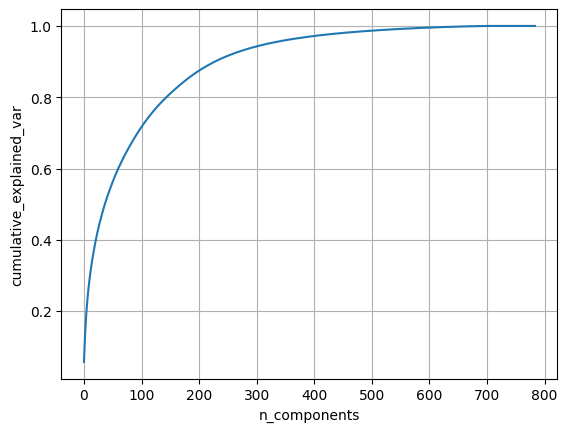

In [43]:
# using the 784 dimensions 
pca.n_components = 784 

pca_data = pca.fit_transform(sample_data)
explainded_variance_vector = pca.explained_variance_ 
print(explainded_variance_vector.shape) 

percentage_var_explained = explainded_variance_vector / np.sum(explainded_variance_vector)
cum_var_explained = np.cumsum(percentage_var_explained) 

plt.clf()
plt.plot(cum_var_explained) # plots the cumulative explained variance against the number of components. 
plt.axis('tight') # make the axis fit the current plot content 
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('cumulative_explained_var')
plt.show()

From the graph presented above, it can be inferred that:

1. With only 20 components, approximately 30% of the data variance is explained.
2. Around 300 components, approximately 90% of the data variance is explained.
